In [113]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [114]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
print(city_data_df.head(10))

# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
print(ride_data_df.head(10))

            city  driver_count   type
0    Richardfort            38  Urban
1   Williamsstad            59  Urban
2    Port Angela            67  Urban
3     Rodneyfort            34  Urban
4    West Robert            39  Urban
5   West Anthony            70  Urban
6    West Angela            48  Urban
7  Martinezhaven            25  Urban
8      Karenberg            22  Urban
9    Barajasview            26  Urban
                 city                 date   fare        ride_id
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344
5        South Latoya  2019-03-11 12:26:48   9.52  1994999424437
6       New Paulville  2019-02-27 11:17:56  43.25   793208410091
7        Simpsonburgh  2019-04-26 00:43:24  35.98   1119539277

In [115]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left",on=["city","city"])

# Create dataframes for Urban, Suburban, Rural types
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

urban_city_df = city_data_df[city_data_df["type"] == "Urban"]
suburban_city_df = city_data_df[city_data_df["type"] == "Suburban"]
rural_city_df = city_data_df[city_data_df["type"] == "Rural"]


# Get total Rides
Total_Urban_Rides = int(urban_cities_df.groupby(["type"]).count()["ride_id"])
Total_Suburban_Rides = int(suburban_cities_df.groupby(["type"]).count()["ride_id"])
Total_Rural_Rides = int(rural_cities_df.groupby(["type"]).count()["ride_id"])


In [116]:
# Get Total Drivers
Total_Urban_Drivers = int(urban_city_df.groupby(["type"]).sum()["driver_count"])
Total_Suburban_Drivers = int(suburban_city_df.groupby(["type"]).sum()["driver_count"])
Total_Rural_Drivers = int(rural_city_df.groupby(["type"]).sum()["driver_count"])

In [117]:
# Get Total Fares
Total_Urban_Fares = float(urban_cities_df.groupby(["type"]).sum()["fare"])
Total_Suburban_Fares = float(suburban_cities_df.groupby(["type"]).sum()["fare"])
Total_Rural_Fares = float(rural_cities_df.groupby(["type"]).sum()["fare"])

# Get Average Fare per Ride
Average_Urban_FarepRide = float(Total_Urban_Fares / Total_Urban_Rides)
Average_Suburban_FarepRide = float(Total_Suburban_Fares / Total_Suburban_Rides)
Average_Rural_FarepRide = float(Total_Rural_Fares / Total_Rural_Rides)

# Get Average Fare per Driver
Average_Urban_FarepDriver = float(Total_Urban_Fares / Total_Urban_Drivers)
Average_Suburban_FarepDriver = float(Total_Suburban_Fares / Total_Suburban_Drivers)
Average_Rural_FarepDriver = float(Total_Rural_Fares / Total_Rural_Drivers)
Total_Urban_Fares

39854.380000000085

In [118]:
# Create Dataframe
summary_data = {'Type':["Rural","Suburban","Urban"],
                'Total Rides':[Total_Rural_Rides,Total_Suburban_Rides,Total_Urban_Rides],
                'Total Drivers':[Total_Rural_Drivers,Total_Suburban_Drivers,Total_Urban_Drivers],
                'Total Fares':[Total_Rural_Fares,Total_Suburban_Fares,Total_Urban_Fares],
                'Average Fare per Ride':[Average_Rural_FarepRide,Average_Suburban_FarepRide,Average_Urban_FarepRide],
                'Average Fare per Driver':[Average_Rural_FarepDriver,Average_Suburban_FarepDriver,Average_Urban_FarepDriver]
               }
summary_data_df = pd.DataFrame(summary_data, columns =['Type','Total Rides','Total Drivers','Total Fares','Average Fare per Ride','Average Fare per Driver'])
summary_data_df

,Type,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
0,Rural,125,78,4327.93,34.623440,55.486282
1,Suburban,625,490,19356.33,30.970128,39.502714
2,Urban,1625,2405,39854.38,24.525772,16.571468


In [119]:
# Index change
summary_data_df = summary_data_df.set_index("Type")
summary_data_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [120]:
# Formatting
summary_data_df["Total Fares"] = summary_data_df["Total Fares"].map("${:.2f}".format)
summary_data_df["Average Fare per Ride"] = summary_data_df["Average Fare per Ride"].map("${:.2f}".format)
summary_data_df["Average Fare per Driver"] = summary_data_df["Average Fare per Driver"].map("${:.2f}".format)


summary_data_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Type,,,,,
Rural,125,78,$4327.93,$34.62,$55.49
Suburban,625,490,$19356.33,$30.97,$39.50
Urban,1625,2405,$39854.38,$24.53,$16.57


In [121]:
# Rename Columns
pyber_data_df = pyber_data_df.rename(columns={'city':'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})
pyber_data_df

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [190]:
# Copy selected columns to new DataFrame
selected_columns = pyber_data_df[["Date","City Type","Fare"]]
selected_columns["Date"] = pd.to_datetime(selected_columns["Date"])
DateCityFare_df = selected_columns.copy()
DateCityFare_df


C:\Users\ackit\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,City Type,Fare
0,2019-01-14 10:14:22,Urban,13.83
1,2019-03-04 18:24:09,Urban,30.24
2,2019-02-24 04:29:00,Urban,33.44
3,2019-02-10 23:22:03,Urban,23.44
4,2019-03-06 04:28:35,Urban,34.58
...,...,...,...
2370,2019-04-29 17:04:39,Rural,13.38
2371,2019-01-30 00:05:47,Rural,20.76
2372,2019-02-10 21:03:50,Rural,11.11
2373,2019-05-07 19:22:15,Rural,44.94


In [191]:
# Index change
DateCityFare_df = DateCityFare_df.set_index("Date")
DateCityFare_df

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11


In [192]:
Fare_By_DateCity = DateCityFare_df.groupby(["Date", "City Type"]).sum()["Fare"]
Fare_By_DateCity_df = pd.DataFrame(Fare_By_DateCity)
Fare_By_DateCity_df

,,Fare
Date,City Type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [194]:
# Index change
Fare_By_DateCity_df = Fare_By_DateCity_df.reset_index()

In [195]:
FareCityDate_Pivot = Fare_By_DateCity_df.pivot(index="Date",columns="City Type", values ="Fare")
FareCityDate_Pivot

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [196]:
Pivot_df = FareCityDate_Pivot.loc['2019-01-01':'2019-04-28']
Pivot_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [203]:
WeeklyBins_df = Pivot_df.resample('1W').sum()
MonthlyBins_df = Pivot_df.resample('1M').sum()

In [204]:
WeeklyBins_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [220]:
MonthlyBins_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-31,940.00,4796.08,9054.33
2019-02-28,919.17,4442.70,8875.99
2019-03-31,877.50,4341.99,9845.95
2019-04-30,1177.02,4302.57,9289.51


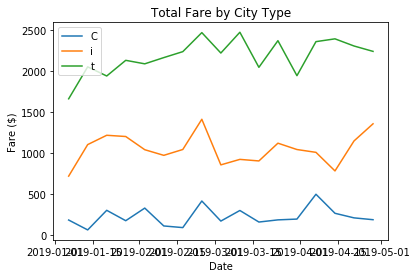

In [235]:
plt.plot(WeeklyBins_df)
plt.xlabel("Date")
plt.ylabel("Fare ($)")
plt.title("Total Fare by City Type")
plt.legend(,loc = "best")

No handles with labels found to put in legend.


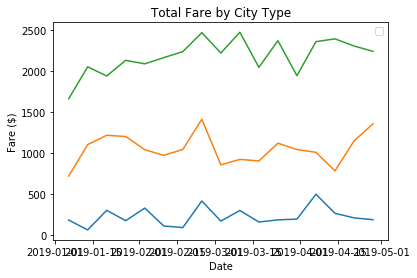

In [229]:
custom_df = pd.DataFrame({
    "Rural":WeeklyBins_df["Rural"],
    "Suburban":WeeklyBins_df["Suburban"],
    "Urban":WeeklyBins_df["Urban"]
})
custom_df
plt.plot(custom_df)
plt.xlabel("Date")
plt.ylabel("Fare ($)")
plt.title("Total Fare by City Type")
plt.legend()

In [240]:
WeeklyBins2 = WeeklyBins_df.reset_index()
WeeklyBins2

City Type,Date,Rural,Suburban,Urban
0,2019-01-06,187.92,721.60,1661.68
1,2019-01-13,67.65,1105.13,2050.43
2,2019-01-20,306.00,1218.20,1939.02
3,2019-01-27,179.69,1203.28,2129.51
4,2019-02-03,333.08,1042.79,2086.94
5,2019-02-10,115.80,974.34,2162.64
6,2019-02-17,95.82,1045.50,2235.07
7,2019-02-24,419.06,1412.74,2466.29
8,2019-03-03,175.14,858.46,2218.20
9,2019-03-10,303.94,925.27,2470.93


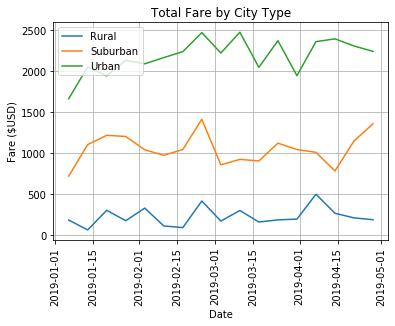

In [259]:
plt.plot(WeeklyBins2["Date"],WeeklyBins2["Rural"],label="Rural")
plt.plot(WeeklyBins2["Date"],WeeklyBins2["Suburban"],label ="Suburban")
plt.plot(WeeklyBins2["Date"],WeeklyBins2["Urban"],label="Urban")
plt.xticks(rotation = 'vertical')
plt.title("Total Fare by City Type")
plt.legend(loc = "best")
plt.xlabel("Date")
plt.ylabel("Fare ($USD)")
plt.grid()
plt.savefig("analysis/Challenge.png")


In [261]:
WeeklyBins2.describe()

City Type,Rural,Suburban,Urban
count,17.000000,17.000000,17.000000
mean,230.217059,1051.961176,2180.340000
std,113.517344,186.173886,213.689551
min,67.650000,721.600000,1661.680000
25%,175.140000,925.270000,2050.430000
50%,191.850000,1045.060000,2218.200000
75%,303.940000,1149.270000,2356.700000
max,501.240000,1412.740000,2470.930000
